# ESCUELA POLITÉCNICA NACIONAL

![](logoEpn.jpg){width=3cm height=3cm fig-align="center"}

# TAREA N°6 Ejercicios Unidad 03 A

## Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

### 1. $\frac{1}{25x^2+1}, x_0=0$

#### Aproximación de Taylor

$x_0​=0$

$f​(x)=\frac{1}{25x^2+1} \quad \implies \quad f(0)=1​$

$f​'(x)=-\frac{50x}{(25x^2+1)^2}​ \quad \implies \quad f'(0)=0$

$f''(x) = \frac{-50(1 - 75x^2)}{(25x^2+1)^3} \quad \implies \quad f''(0) = -50$

$f'''(0) = \frac{15000(0)(1 - 25(0)^2)}{(25(0)^2+1)^4} = 0 \quad \implies \quad f'''(0)=0$

$f^{(4)}(x) = \frac{-15000(25x^2-1)}{(25x^2+1)^4}\quad \implies \quad f^{(4)}(0) = 15000$

$P_2(x) = 1 + 0x + \frac{-50}{2}x^2 = 1 - 25x^2$


Ejercicio 1: 1/(25x^2+1), x0=0
Polinomio de Taylor de grado 2:
1 - 25*x**2
Orden del error: O(x^4)


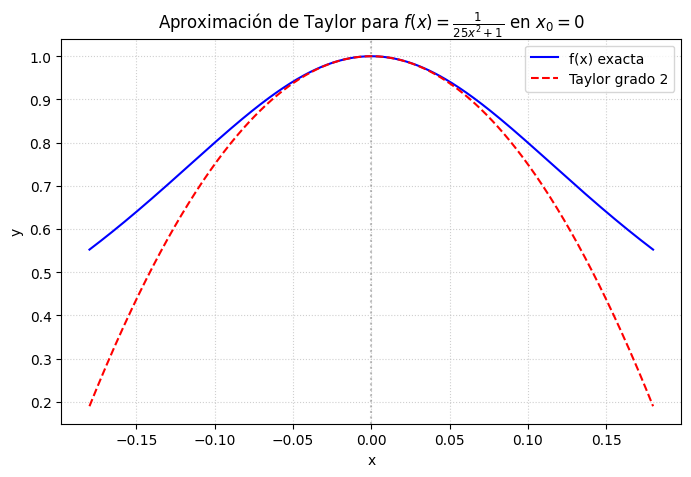

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Símbolo y función
x = sp.Symbol('x')
f1 = 1 / (25 * x**2 + 1)
x0_1 = 0
n1 = 2  # grado del polinomio

# Serie de Taylor
P_taylor_1 = f1.series(x, x0_1, n1 + 1).removeO()
# El orden del error es n+1
orden_error = 4

print("Ejercicio 1: 1/(25x^2+1), x0=0")
print(f"Polinomio de Taylor de grado {n1}:")
print(P_taylor_1)
print(f"Orden del error: O(x^{orden_error})")

# Funciones Numéricas
f1_np = sp.lambdify(x, f1, 'numpy')
P_taylor_np = sp.lambdify(x, P_taylor_1, 'numpy')

x_vals = np.linspace(-0.18, 0.18, 400)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f1_np(x_vals), label='f(x) exacta', color='blue')
plt.plot(x_vals, P_taylor_np(x_vals), '--', label=f'Taylor grado {n1}', color='red')

plt.title(r"Aproximación de Taylor para $f(x)=\frac{1}{25x^2+1}$ en $x_0=0$")
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x0_1, color='gray', linestyle=':', alpha=0.5)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

#### Polinomio de Lagrange (puntos simétricos)

Puntos:
$x_0=-0.1,\quad x_1=0,\quad x_2=0.1$

Valores:
$f(-0.1)=0.8,\quad f(0)=1,\quad f(0.1)=0.8$

Fórmula:

$P_L(x)=0.8\frac{(x-0)(x-0.1)}{(-0.1-0)(-0.1-0.1)}+1\frac{(x+0.1)(x-0.1)}{(0+0.1)(0-0.1)}+0.8\frac{(x+0.1)x}{(0.1+0.1)(0.1-0)}$

Simplificado:

$P_L(x)=1 - 25x^2$


Polinomio de Lagrange (grado 2) simbólico para nodos [-0.18, 0.0, 0.18] :
                        2
1.0 - 13.8121546961326⋅x 


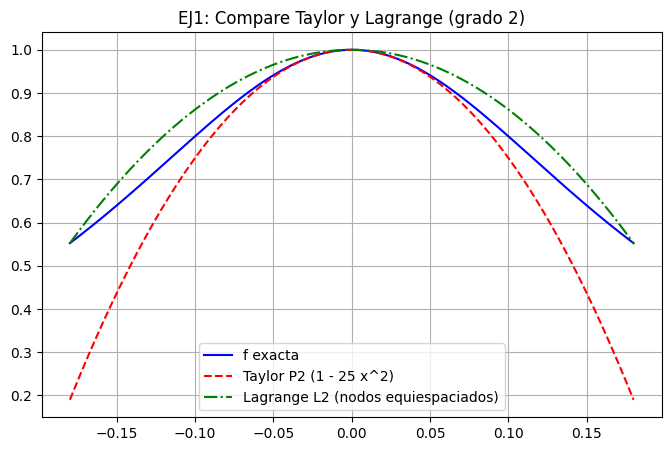

Error máximo en [-0.18,0.18]: Taylor deg2 = 3.625e-01, Lagrange deg2 = 6.590e-02


In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# función
x = sp.Symbol('x')
f1 = 1/(25*x**2 + 1)
# nodos equiespaciados en [-0.18, 0.18]
nodes = [-0.18, 0.0, 0.18]
y_nodes = [f1.subs(x, xi) for xi in nodes]

# Polinomio de Lagrange grado 2
L = 0
for k, xk in enumerate(nodes):
    lk = 1
    denom = 1
    for j, xj in enumerate(nodes):
        if j==k: continue
        lk = lk * (x - xj)
        denom = denom * (xk - xj)
    L += y_nodes[k] * (lk/denom)

L_simpl = sp.simplify(sp.expand(L))
print("Polinomio de Lagrange (grado 2) simbólico para nodos", nodes, ":")
sp.pprint(L_simpl)

# Funciones Numéricas
f1_np = sp.lambdify(x, f1, 'numpy')
L_np  = sp.lambdify(x, L_simpl, 'numpy')

# Taylor grado 2 (ya conocido)
P2 = sp.expand(1 - 25*x**2)
P2_np = sp.lambdify(x, P2, 'numpy')

# Gráfica comparativa
x_vals = np.linspace(-0.18, 0.18, 400)
plt.figure(figsize=(8,5))
plt.plot(x_vals, f1_np(x_vals), label='f exacta', color='blue')
plt.plot(x_vals, P2_np(x_vals), '--', label='Taylor P2 (1 - 25 x^2)', color='red')
plt.plot(x_vals, L_np(x_vals), '-.', label='Lagrange L2 (nodos equiespaciados)', color='green')
plt.legend(); plt.grid(True); plt.title('EJ1: Compare Taylor y Lagrange (grado 2)')
plt.show()

# Error máximo en el intervalo
err_taylor = np.max(np.abs(f1_np(x_vals) - P2_np(x_vals)))
err_lagrange = np.max(np.abs(f1_np(x_vals) - L_np(x_vals)))
print(f"Error máximo en [-0.18,0.18]: Taylor deg2 = {err_taylor:.3e}, Lagrange deg2 = {err_lagrange:.3e}")

### 2. $arctan(x),x_0=1$

#### Aproximación de Taylor

$x_0 = 1$

$f(x)=\arctan(x) \implies f(1)=\frac{\pi}{4}$

$f'(x)=\frac{1}{x^2+1} \implies f'(1)=\frac{1}{2}$

$f''(x)=\frac{-2(x)}{(x^2+1)^2} \implies f''(1)=-\frac{1}{2}$

$f'''(x)=\frac{6(x)^2-2)}{(x^2+1)^3} \implies f'''(1)=\frac{1}{2}$

$P_1(x)=\frac{\pi}{4} + \frac{1}{2}(x-1)$


Ejercicio 2: arctan(x), x0 = 1
Polinomio de Taylor de grado 1:
x/2 - (x - 1)**2/4 - 1/2 + pi/4
Orden del error matemático: O((x - 1)^2)


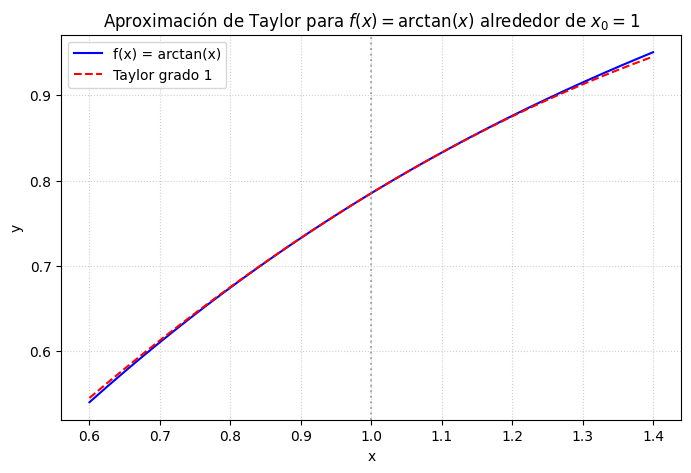

In [2]:
# Ejercicio 2: f(x) = arctan(x), x0 = 1
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Símbolo y función
x = sp.Symbol('x')
f2 = sp.atan(x)
x0_2 = 1
n2 = 1  # grado deseado del polinomio de Taylor

# Serie de Taylor alrededor de x0 = 1
P_taylor_2 = f2.series(x, x0_2, n2 + 2).removeO()
# Primer término de orden (x-1)^2
orden_error = 2

print("\nEjercicio 2: arctan(x), x0 = 1")
print(f"Polinomio de Taylor de grado {n2}:")
print(P_taylor_2)
print(f"Orden del error matemático: O((x - 1)^{orden_error})")

# Funciones Numéricas
f2_np = sp.lambdify(x, f2, 'numpy')
P_taylor_2_np = sp.lambdify(x, P_taylor_2, 'numpy')

# Rango de x alrededor de x0 = 1
x_vals_2 = np.linspace(0.6, 1.4, 400)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x_vals_2, f2_np(x_vals_2), label='f(x) = arctan(x)', color='blue')
plt.plot(x_vals_2, P_taylor_2_np(x_vals_2), '--', label=f'Taylor grado {n2}', color='red')

plt.title(r"Aproximación de Taylor para $f(x)=\arctan(x)$ alrededor de $x_0=1$")
plt.xlabel('x')
plt.ylabel('y')
plt.axvline(x0_2, color='gray', linestyle=':', alpha=0.6)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

#### Polinomio de Lagrange (gr. 2)

Nodos:
$x_0=0.6,\quad x_1=1.0,\quad x_2=1.4$

Valores:
$f(0.6)=0.5404,\quad f(1)=0.7854,\quad f(1.4)=0.9505$

Fórmula:

$P_L(x)=0.5404\frac{(x-1)(x-1.4)}{(0.6-1)(0.6-1.4)}$
$+ 0.7854\frac{(x-0.6)(x-1.4)}{(1-0.6)(1-1.4)}$
$+ 0.9505\frac{(x-0.6)(x-1)}{(1.4-0.6)(1.4-1)}$

Polinomio de Lagrange (grado 2) simbólico para nodos [0.6, 1.0, 1.4] :
                     2                                          
- 0.249468705350742⋅x  + 1.01159658637835⋅x + 0.0232702823698423


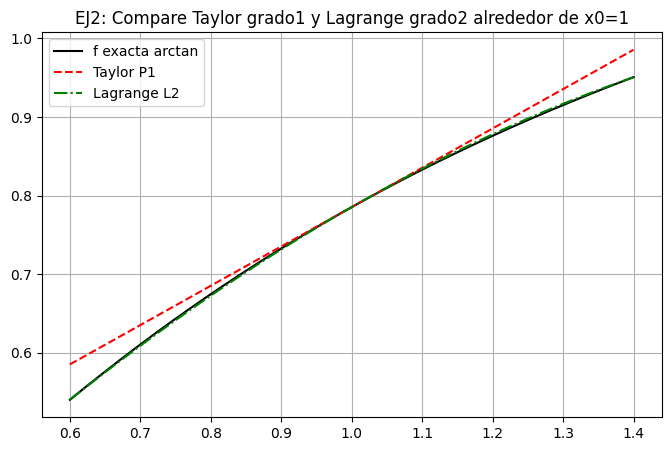

Error máximo en [0.6,1.4]: Taylor deg1 = 4.498e-02, Lagrange deg2 = 1.939e-03


In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# función
x = sp.Symbol('x')
f2 = sp.atan(x)

# nodos (alrededor de 1)
nodes2 = [0.6, 1.0, 1.4]
y_nodes2 = [f2.subs(x, xi) for xi in nodes2]

# Polinomio de Lagrange grado 2
L2 = 0
for k, xk in enumerate(nodes2):
    lk = 1
    denom = 1
    for j, xj in enumerate(nodes2):
        if j==k: continue
        lk = lk * (x - xj)
        denom = denom * (xk - xj)
    L2 += y_nodes2[k] * (lk/denom)

L2_simpl = sp.simplify(sp.expand(L2))
print("Polinomio de Lagrange (grado 2) simbólico para nodos", nodes2, ":")
sp.pprint(L2_simpl)

# Funciones Numéricas
f2_np = sp.lambdify(x, f2, 'numpy')
L2_np  = sp.lambdify(x, L2_simpl, 'numpy')

# Taylor grado 1 ya calculado: P1(x) = pi/4 + 1/2 (x-1)
P1 = sp.simplify(sp.pi/4 + sp.Rational(1,2)*(x-1))
P1_np = sp.lambdify(x, P1, 'numpy')

# Gráfica comparativa
x_vals2 = np.linspace(0.6, 1.4, 400)
plt.figure(figsize=(8,5))
plt.plot(x_vals2, f2_np(x_vals2), label='f exacta arctan', color='black')
plt.plot(x_vals2, P1_np(x_vals2), '--', label='Taylor P1', color='red')
plt.plot(x_vals2, L2_np(x_vals2), '-.', label='Lagrange L2', color='green')
plt.legend(); plt.grid(True); plt.title('EJ2: Compare Taylor grado1 y Lagrange grado2 alrededor de x0=1')
plt.show()

# Error máximo en el intervalo
err_taylor = np.max(np.abs(f2_np(x_vals2) - P1_np(x_vals2)))
err_lagrange = np.max(np.abs(f2_np(x_vals2) - L2_np(x_vals2)))
print(f"Error máximo en [0.6,1.4]: Taylor deg1 = {err_taylor:.3e}, Lagrange deg2 = {err_lagrange:.3e}")

## Link del repositorio GitHub

[github_TamyBenavidez](https://github.com/TamyBenavidez/MN/tree/main/Tarea06), Tarea N°6